# Train / Test
# 訓練 / 測試

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

創建一些資料集，構建一個模型（在此例中為多項式回歸）：

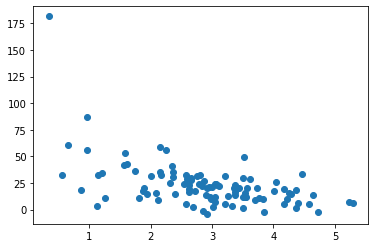

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount);

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

將數據一分為二 - 80% 將用於「訓練」我們的模型，其餘 20% 用於測試。這樣我們就可以避免過度擬合。

In [2]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

以下是訓練的資料集：

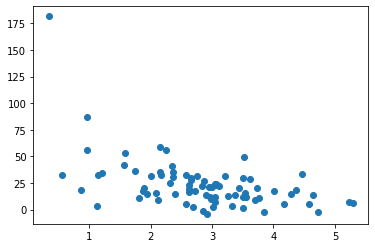

In [3]:
scatter(trainX, trainY);

And our test dataset:

以下是測試的資料集：

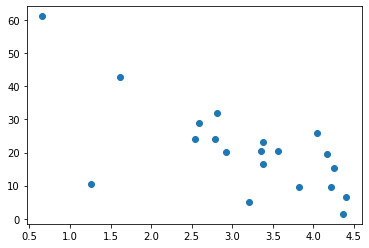

In [4]:
scatter(testX, testY);

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

嘗試用8階多項式處理此資料（鑒於我們所知道的數據是如何生成的，這幾乎可以肯定是過度擬合的！

In [5]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

Let's plot our polynomial against the training data:

根據訓練數據繪製我們的預測值：

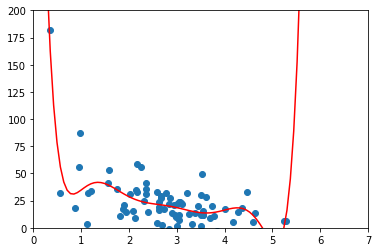

In [6]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

與我們的測試數據對比：

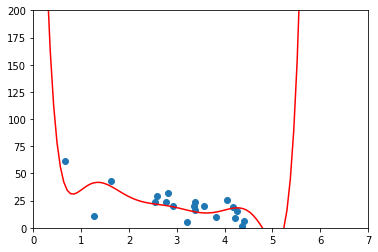

In [7]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

曲線在測試集上， 看起來沒那麼糟， 但是測試數據上的 r 平方分數有點可怕！這告訴我們，我們的模型不是那麼好...

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.30018168611711415


...even though it fits the training data better:

...即使它更適合順練數據：

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.6427069514692199


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.


如果您正在使用熊貓數據框架（使用表格、標記數據）進行科學學習，則具有內置train_test_split功能，便於此。

稍後，我們將討論更穩健的列車/測試形式，如 K 折交叉驗證 - 我們嘗試多個不同的數據拆分，以確保我們不只是幸運地在拆分數據時。

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

嘗試使用不同程度的多項式擬合來測試數據上的誤差。怎麼樣能效果最好？

In [40]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 7))

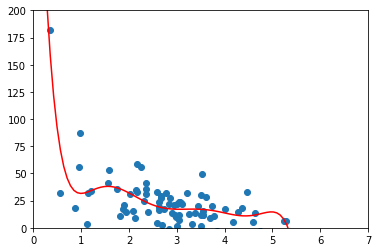

In [41]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


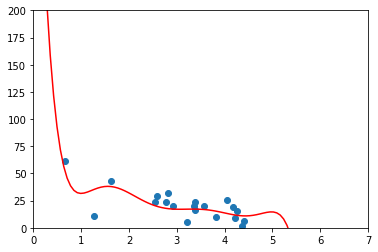

In [42]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.5461451452853898


In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.6170116571732178
